In [1]:
from alpha_vantage.timeseries import TimeSeries #For stock timeseries data
import math #for nan check
import pandas as pd
import numpy as np #for nan tests

In [148]:
ts = TimeSeries(key='Z4GYC8KFAQZCUZ51', output_format='pandas')
data, meta_data = ts.get_weekly_adjusted('brk.b')

column = '5. adjusted close'

In [149]:
short_mva = (data[column]['2003-01-01':]).rolling(window=20).mean()
long_mva = (data[column]['2003-01-01':]).rolling(window=50).mean()

In [150]:
#Finds and drops all nan values and makes sure the series are of equal length
index = 0
while(index < len(short_mva)):
    if(math.isnan(short_mva[index]) == True or math.isnan(long_mva[index]) == True):
        short_mva = short_mva.drop([short_mva.index[0]])
        long_mva = long_mva.drop([long_mva.index[0]])
    index = index + 1

In [151]:
index = 0
buying = 0
selling = 1
initial = 10000
number_of_stocks = 0
final = 0
last_buy = 0
while(index < len(short_mva)):    
    #SELLING
    #1.5 is magic number and is used to avoid buying at e.g. 50 and selling at 50.1
    #Is it good to have this stop? Should I just not include crisis data?
    #What if I had a much larger filter?
    if(buying and short_mva[index] < long_mva[index] and data[column].get(short_mva.index[index-1]) > last_buy*1.5):
        selling = 1
        buying = 0      
        print "Selling in " + str(short_mva.index[index-1]) +  " at " + str(data[column].get(short_mva.index[index-1]))
        final += number_of_stocks*data[column].get(short_mva.index[index-1])
        #print str(final) + ", " + str(data[column].get(short_mva.index[index-1])) + ", " + str(number_of_stocks)
        number_of_stocks = 0
       
    #BUYING
    elif(selling and short_mva[index] > long_mva[index]):
        selling = 0
        buying = 1
        number_of_stocks = int(initial/data[column].get(short_mva.index[index-1]))
        final -= initial
        #print str(final) + ", " + str(data[column].get(short_mva.index[index-1])) + ", " + str(number_of_stocks)
        print "Buying in " + str(short_mva.index[index-1] ) +  " at " + str(data[column].get(short_mva.index[index-1]))
        last_buy = data[column].get(short_mva.index[index-1])
        
    #Closing the position
    if(index == len(short_mva) - 1 and number_of_stocks != 0):
        print "Selling in " + str(short_mva.index[index-1] ) +  " at " + str(data[column].get(short_mva.index[index-1]))
        final += number_of_stocks*data[column].get(short_mva.index[index-1])
        
    index = index + 1

Buying in 2003-12-05 at 56.0
Selling in 2008-09-19 at 91.9
Buying in 2009-09-25 at 65.36
Selling in 2015-07-10 at 139.73
Buying in 2016-05-06 at 144.62
Selling in 2018-12-21 at 192.1


In [152]:
final

20852.059999999998

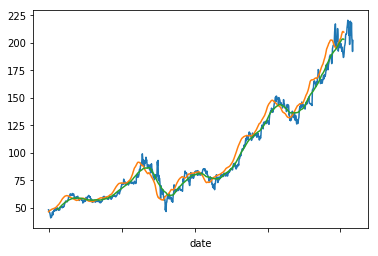

In [153]:
data[column]['2003-01-01':].plot()
short_mva.plot()
long_mva.plot()